# DecissionTree From Scracth

# Import Statement

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

# Load and Prepare Data

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = data.copy()
df = df.drop(columns = 'Id', axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.duplicated().sum()

3

In [7]:
# Jika duplikasi dihapus output dari tree berantakan
# df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

3

In [9]:
def train_test_split(df, test_size, random_seed):
    
    if isinstance(test_size, float):
        test_size = round(len(df) * test_size)
            
    random.seed(random_seed)
    
    indices = df.index.tolist()
    test_indices = random.sample(population = indices, k = test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
        
    
    return train_df, test_df

In [10]:
train_df, test_df = train_test_split(df, test_size = 20, random_seed = 0)

In [11]:
len(df)

150

In [12]:
len(test_df)

20

In [13]:
len(train_df)

130

In [14]:
test_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


# Helper Function

In [15]:
data = train_df.values

# Data pure?

In [16]:
def check_purity(data):
    
    species_columns = data[:,-1]
    unique_classes = np.unique(species_columns)

    if len(unique_classes) == 1:    
        return True
    else:
        return False

In [17]:
check_purity(train_df[train_df.PetalWidthCm > 0.8].values)

False

# Classify

In [18]:
def classify_data(data):
    
    # hanya ambil kolom Species
    species_columns = data[:,-1]
    # Menghitung akurasi dari setiap class unik di kolom Species
    unique_classes, counts_unique_classes = np.unique(species_columns, return_counts = True)
    
    # Cari index  yang paling banyak muncul(modus)
    index = counts_unique_classes.argmax()
    
    # Mengambil label klasifikasi dengan jumlah tertinggi
    classification = unique_classes[index]
    
    return classification

# Potential splits

In [19]:
train_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# def get_potential_splits(data):
    
# column_index

In [21]:
def get_potential_splits(data):

    potential_splits = {}  # Inisialisasi kamus untuk menyimpan potensi pembagian
    _, n_columns = data.shape  # Mendapatkan jumlah baris dan kolom dari dataset

    # Iterasi melalui setiap kolom kecuali kolom terakhir (target variable)
    for column_index in range(n_columns - 1):
        potential_splits[column_index] = []  # Inisialisasi kamus untuk menyimpan potensi pembagian pada kolom tertentu
        values = data[:, column_index]  # Mengambil nilai-nilai pada kolom tersebut dari dataset
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value) / 2
                
                potential_splits[column_index].append(potential_split)

    return potential_splits

In [22]:
potential_splits = get_potential_splits(train_df.values)

In [23]:
potential_splits

{0: [4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.15,
  6.25,
  6.35,
  6.45,
  6.55,
  6.65,
  6.75,
  6.85,
  6.95,
  7.05,
  7.15,
  7.4,
  7.65,
  7.800000000000001],
 1: [2.1,
  2.25,
  2.3499999999999996,
  2.45,
  2.55,
  2.6500000000000004,
  2.75,
  2.8499999999999996,
  2.95,
  3.05,
  3.1500000000000004,
  3.25,
  3.3499999999999996,
  3.45,
  3.55,
  3.6500000000000004,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.300000000000001],
 2: [1.05,
  1.15,
  1.25,
  1.35,
  1.45,
  1.55,
  1.65,
  1.7999999999999998,
  2.5999999999999996,
  3.4,
  3.6,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.25,
  4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.25,
  6.5,
  6.65,
  6.800000000000001],
 3: [0.15000000000000002,
  0.25,
  0.35,
  0.45,
  0.55,
  0.8,
  1.0

C:\Users\azrul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


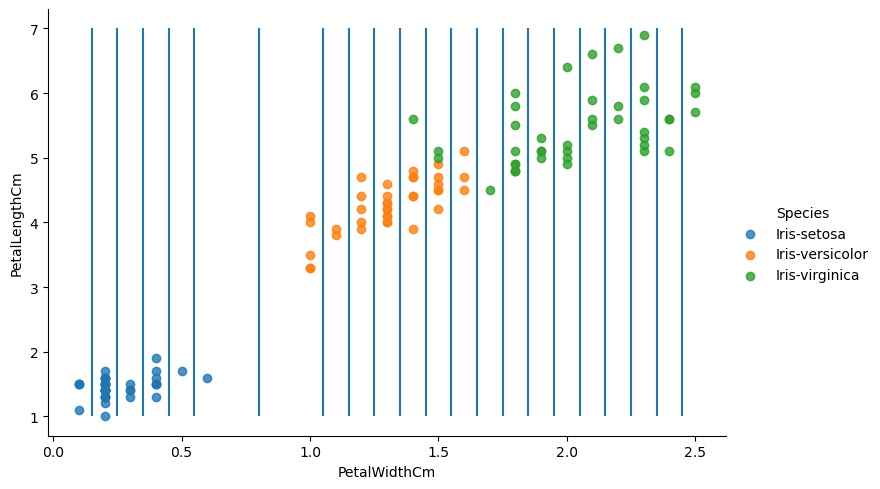

In [99]:
sns.lmplot(data    = train_df,
           x       = "PetalWidthCm",
           y       = "PetalLengthCm",
           hue     = "Species",
           fit_reg = False,
           aspect  = 1.5)

plt.vlines(x = potential_splits[3], ymin = 1, ymax = 7)
# plt.hlines(y = potential_splits[2], xmin = 0, xmax = 2.5)

# Split Data 

In [25]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]
    data_below          = data[split_column_values <= split_value]
    data_above          = data[split_column_values > split_value]
    
    return data_below, data_above

In [26]:
split_column = 3
split_value = 0.8

In [27]:
data_below, data_above = split_data(data, split_column, split_value)

C:\Users\azrul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 2.6)

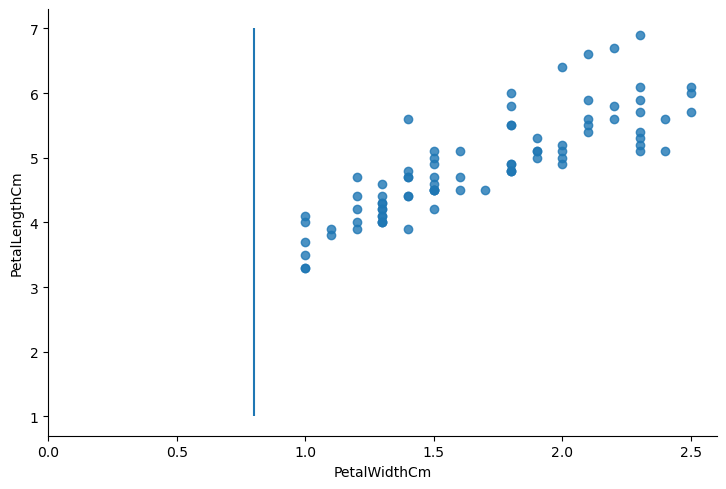

In [28]:
ploting_df = pd.DataFrame(data_above, columns = df.columns)
sns.lmplot(data    = ploting_df,
           x       = "PetalWidthCm",
           y       = "PetalLengthCm",
           fit_reg = False,
           aspect  = 1.5)
plt.vlines(x = split_value, ymin = 1, ymax = 7)
plt.xlim(0, 2.6)

# Lowest Overall Entropy?


In [29]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [30]:
calculate_entropy(data_below)

0.0

In [31]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [32]:
calculate_overall_entropy(data_below, data_above)

0.6461538461538462

In [33]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [34]:
potential_splits = get_potential_splits(data)

In [35]:
determine_best_split(data, potential_splits)

(3, 0.8)

# Decision Tree Algorithm

Representation of the Decision Tree

In [36]:
sub_tree = {"question": ["yes_answer",
                         "no_answer"]}

In [37]:
example_tree = {"PetalWidthCm <= 0.8": ["Iris-setosa",
                        {"PetalWidthCm <= 1.75": [{"PetalLengthCm <= 4.9": ["Iris-versicolor",
                                                                            "iris-virginica"]},
                                                 "Iris-virginica"]}]}

# Algorithm

In [38]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [39]:
tree = decision_tree_algorithm(train_df)
tree

{'PetalWidthCm <= 0.8': ['Iris-setosa',
  {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
      {'PetalWidthCm <= 1.55': ['Iris-virginica', 'Iris-versicolor']}]},
    {'PetalLengthCm <= 4.85': [{'SepalWidthCm <= 3.1': ['Iris-virginica',
        'Iris-versicolor']},
      'Iris-virginica']}]}]}

In [40]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Classification

sub_tree = {question: [yes_answer,no_answer]}

In [60]:
example = test_df.iloc[1]
example

SepalLengthCm               7.3
SepalWidthCm                2.9
PetalLengthCm               6.3
PetalWidthCm                1.8
Species          Iris-virginica
Name: 107, dtype: object

In [97]:
def classify_example(example, tree):
    
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer

    else:
        residual_tree = answer
        return classify_example(example, answer)

In [98]:
classify_example(example, tree)

'Iris-virginica'

# Accuracy 

In [71]:
def calculated_accuracy(df, tree):
    
    df["classification"] = df.apply(classify_example, axis = 1, args = (tree,))
    df["classification_correct"] = df.classification == df.Species
    accuracy = df.classification_correct.mean()
    
    return accuracy

In [72]:
calculated_accuracy(test_df, tree)

0.9

In [75]:
test_df.loc[77]

SepalLengthCm                         6.7
SepalWidthCm                          3.0
PetalLengthCm                         5.0
PetalWidthCm                          1.7
Species                   Iris-versicolor
classification             Iris-virginica
classification_correct              False
Name: 77, dtype: object

In [79]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_seed = 0)
tree = decision_tree_algorithm(train_df, max_depth = 3)
accuracy = calculated_accuracy(test_df, tree)

pprint(tree)
pprint(accuracy)

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   'Iris-virginica']}]}
0.9666666666666667


In [80]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#  Titanic Data Set

Prepare and Load Data

In [83]:
# df = pd.read_csv("Titanic.csv")

# df = df.copy()
# df["label"] = df.Survived
# df = df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis = 1)

In [84]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   label     891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [86]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
label         0
dtype: int64

In [90]:
# hndling missing values
median_age =  df.Age.median()
mode_embarked = df.Embarked.mode()[0]

df = df.fillna({"Age": median_age, "Embarked": mode_embarked})

# decision tree algorithm

In [1]:
# train_df, test_df = train_test_split(df, test_size = 0.2, random_seed = 0)
# # tree = decision_tree_algorithm(train_df, max_depth = 3)
# # accuracy = calculated_accuracy(test_df, tree)


NameError: name 'train_test_split' is not defined